In [2]:
import pandas as pd
import numpy as np

In [3]:
#Read the dataset
games= pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/games.csv')
player_play=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/player_play.csv')
players=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/plays.csv')
track_w1=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_1.csv')
track_w2=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_2.csv')
track_w3=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_3.csv')
track_w4=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_4.csv')
track_w5=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_5.csv')
track_w6=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_6.csv')
track_w7=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_7.csv')
track_w8=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_8.csv')
track_w9=pd.read_csv('/Users/lanvu/Downloads/nfl-big-data-bowl-2025/tracking_week_9.csv')


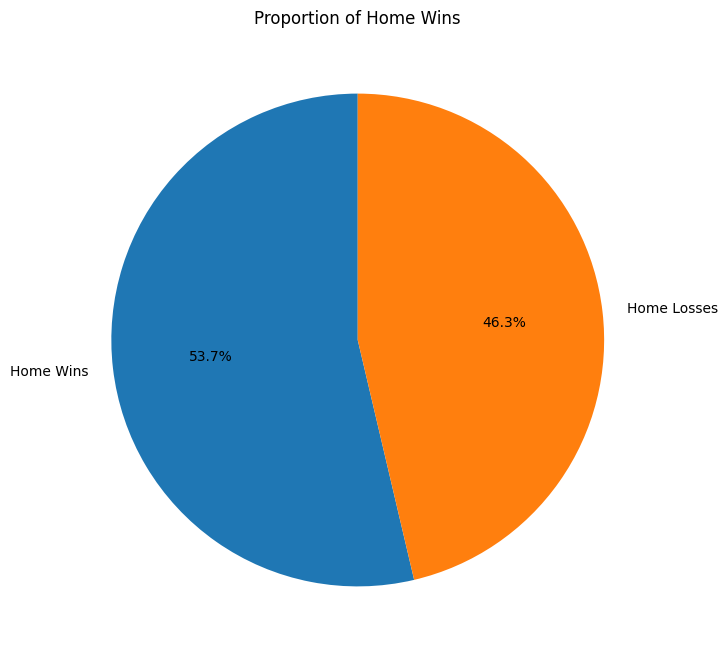

In [5]:
#EDA
import matplotlib.pyplot as plt
games['homeWin'] = games['homeFinalScore'] > games['visitorFinalScore']

# Count wins and losses
win_counts = games['homeWin'].value_counts()

# Prepare labels and values
labels = ['Home Wins', 'Home Losses']
sizes = [win_counts[True], win_counts[False]] if False in win_counts.index else [win_counts[True], 0]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Home Wins')
plt.show()


In [4]:
players.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


           yardsGained  homeTeamWinProbabilityAdded  \
isShotgun                                             
False         5.165587                     0.000321   
True          5.667018                    -0.000335   

           visitorTeamWinProbilityAdded  expectedPointsAdded  
isShotgun                                                     
False                         -0.000321            -0.017891  
True                           0.000335            -0.037420  


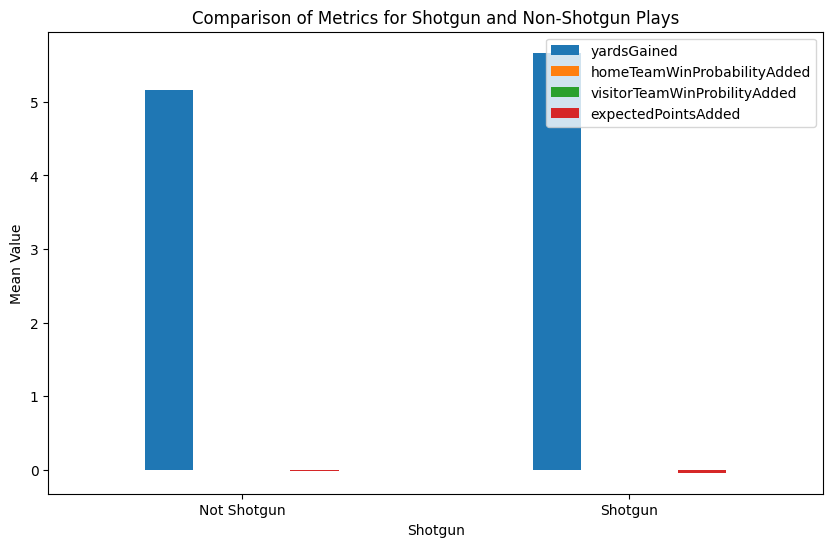

In [10]:
players['isShotgun'] = players['playDescription'].str.contains(r'\(Shotgun\)', case=False, na=False)

# Select relevant columns
shotgun_analysis = players[['isShotgun','yardsGained', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPointsAdded']]

# Group by isShotgun and calculate the mean for each group
shotgun_grouped = shotgun_analysis.groupby('isShotgun').mean()

# Display the results
print(shotgun_grouped)
# Plot the bar chart
shotgun_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Metrics for Shotgun and Non-Shotgun Plays')
plt.xlabel('Shotgun')
plt.ylabel('Mean Value')
plt.xticks(ticks=[0, 1], labels=['Not Shotgun', 'Shotgun'], rotation=0)
plt.legend(loc='best')
plt.show()

           yardsGained  homeTeamWinProbabilityAdded  \
isShotgun                                             
False         0.440757                     0.606962   
True          0.443777                     0.606485   

           visitorTeamWinProbilityAdded  expectedPointsAdded  
isShotgun                                                     
False                          0.393038             0.598718  
True                           0.393515             0.597819  


/var/folders/mp/349wty0d2_nc7qfh3kzx58cm0000gn/T/ipykernel_21958/1971857817.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shotgun_analysis[columns_to_normalize] = scaler.fit_transform(shotgun_analysis[columns_to_normalize])


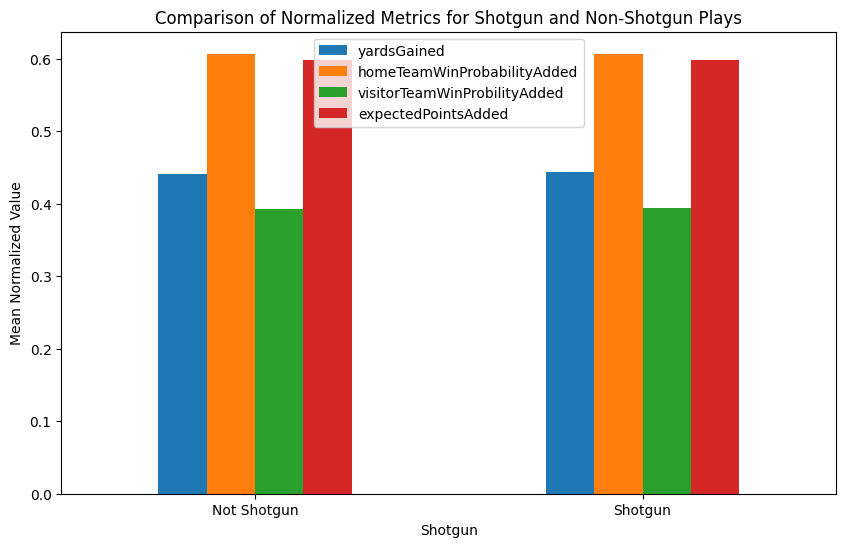

In [13]:
from sklearn.preprocessing import MinMaxScaler
players['isShotgun'] = players['playDescription'].str.contains(r'\(Shotgun\)', case=False, na=False)

# Select relevant columns
shotgun_analysis = players[['isShotgun','yardsGained', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPointsAdded']]


# Select relevant columns for normalization
columns_to_normalize = ['yardsGained', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPointsAdded']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
shotgun_analysis[columns_to_normalize] = scaler.fit_transform(shotgun_analysis[columns_to_normalize])

# Group by isShotgun and calculate the mean for each group
shotgun_grouped_normalized = shotgun_analysis.groupby('isShotgun').mean()

# Display the results
print(shotgun_grouped_normalized)

# Plot the bar chart
shotgun_grouped_normalized.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Normalized Metrics for Shotgun and Non-Shotgun Plays')
plt.xlabel('Shotgun')
plt.ylabel('Mean Normalized Value')
plt.xticks(ticks=[0, 1], labels=['Not Shotgun', 'Shotgun'], rotation=0)
plt.legend(loc='best')
plt.show()

In [15]:
# Group by quarter and isShotgun, then count the number of plays
shotgun_count_by_quarter = players.groupby(['quarter', 'isShotgun'])['playId'].transform('count')

# Display the first few rows to verify the new column
shotgun_count_by_quarter.head()

0    2049
1    2521
2    2521
3    2075
4    2049
Name: playId, dtype: int64

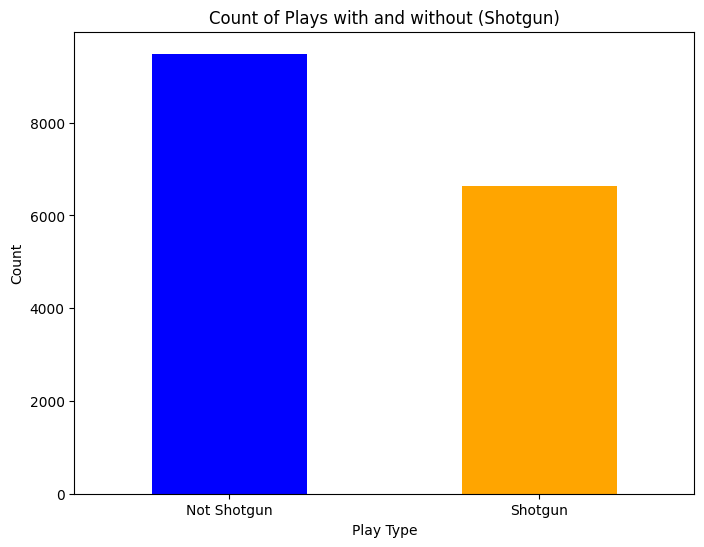

In [ ]:
# Check if playDescription contains "(Shotgun)"
players['isShotgun'] = players['playDescription'].str.contains(r'\(Shotgun\)', case=False, na=False)

# Count the occurrences
shotgun_counts = players['isShotgun'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
shotgun_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['Not Shotgun', 'Shotgun'], rotation=0)
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.title('Count of Plays with and without (Shotgun)')
plt.show()

In [29]:
runConceptSecondary=players['pff_runConceptSecondary']
#runConceptSecondary.value_counts().plot(kind='bar')
players['playDescription'].tail()

16119    (12:49) (Shotgun) T.Lawrence pass incomplete s...
16120    (12:32) (Shotgun) K.Cousins pass incomplete de...
16121    (9:59) (Shotgun) P.Mahomes scrambles right end...
16122    (:45) C.Rush pass incomplete deep right to C.L...
16123    (15:00) Br.Hall up the middle for 34 yards, TO...
Name: playDescription, dtype: object